<a href="https://colab.research.google.com/github/SebaDiezV/Challenge_TelecomX_Parte2_AluraLatam/blob/main/TelecomX_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X - Parte 2**
##**Challenge de Alura Latam y Oracle para el curso de DataScience**

## **01 -  Preparación de los datos**

###**Exportar bibliotécas**

In [110]:
import pandas as pd
import numpy as np

### **Extracción de archivo tratado**

In [111]:
datos = pd.read_csv('/content/datos_tratados.csv')

In [112]:
datos.head()

,id_cliente,cancelacion_cliente,genero,adulto_mayor,pareja,dependiente,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_online,metodo_pago,mensualidad,total,cuentas_diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Sí,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Sí,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Sí,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [113]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7043 non-null   object 
 1   cancelacion_cliente      7043 non-null   object 
 2   genero                   7043 non-null   object 
 3   adulto_mayor             7043 non-null   int64  
 4   pareja                   7043 non-null   int64  
 5   dependiente              7043 non-null   int64  
 6   meses_contrato           7043 non-null   int64  
 7   servicio_telefonico      7043 non-null   int64  
 8   lineas_multiples         7043 non-null   object 
 9   servicio_internet        7043 non-null   object 
 10  seguridad_online         7043 non-null   object 
 11  respaldo_online          7043 non-null   object 
 12  proteccion_dispositivos  7043 non-null   object 
 13  soporte_tecnico          7043 non-null   object 
 14  tv_streaming            

In [114]:
datos.apply(pd.unique)

,0
id_cliente,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
cancelacion_cliente,"[No, Sí]"
genero,"[Female, Male]"
adulto_mayor,"[0, 1]"
pareja,"[1, 0]"
dependiente,"[1, 0]"
meses_contrato,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
servicio_telefonico,"[1, 0]"
lineas_multiples,"[No, Yes, No phone service]"
servicio_internet,"[DSL, Fiber optic, No]"


In [115]:
datos['cancelacion_cliente'] = datos['cancelacion_cliente'].apply(lambda x: x.replace('Sí','1').replace('No','0'))
datos['genero'] = datos['genero'].apply(lambda x: x.replace('Male','1').replace('Female','0'))
datos.sample(3)

,id_cliente,cancelacion_cliente,genero,adulto_mayor,pareja,dependiente,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_online,metodo_pago,mensualidad,total,cuentas_diarias
6321,8947-YRTDV,0,1,0,1,1,32,1,No,Fiber optic,...,Yes,No,No,Yes,One year,0,Mailed check,94.80,3131.55,3.16
6811,9668-PUGNU,0,1,0,1,0,71,1,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Electronic check,24.50,1816.20,0.82
5936,8372-JUXUI,1,1,0,0,1,1,1,Yes,Fiber optic,...,No,No,No,No,Month-to-month,1,Electronic check,74.35,74.35,2.48


In [116]:
datos[['cancelacion_cliente','genero']] = datos[['cancelacion_cliente','genero']].astype(np.int64)

In [117]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7043 non-null   object 
 1   cancelacion_cliente      7043 non-null   int64  
 2   genero                   7043 non-null   int64  
 3   adulto_mayor             7043 non-null   int64  
 4   pareja                   7043 non-null   int64  
 5   dependiente              7043 non-null   int64  
 6   meses_contrato           7043 non-null   int64  
 7   servicio_telefonico      7043 non-null   int64  
 8   lineas_multiples         7043 non-null   object 
 9   servicio_internet        7043 non-null   object 
 10  seguridad_online         7043 non-null   object 
 11  respaldo_online          7043 non-null   object 
 12  proteccion_dispositivos  7043 non-null   object 
 13  soporte_tecnico          7043 non-null   object 
 14  tv_streaming            

### **Eliminación de Columnas Irrelevantes**

In [118]:
datos.columns

Index(['id_cliente', 'cancelacion_cliente', 'genero', 'adulto_mayor', 'pareja',
       'dependiente', 'meses_contrato', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'tipo_contrato',
       'factura_online', 'metodo_pago', 'mensualidad', 'total',
       'cuentas_diarias'],
      dtype='object')

In [119]:
datos = datos.drop(columns =['id_cliente'])

In [120]:
datos.head(2)

,cancelacion_cliente,genero,adulto_mayor,pareja,dependiente,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,seguridad_online,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_online,metodo_pago,mensualidad,total,cuentas_diarias
0,0,0,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.19
1,0,1,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,2.00


###**Verificación de la Proporción de Cancelación (Churn)**

In [121]:
datos['cancelacion_cliente'].value_counts()

,count
cancelacion_cliente,
0,5174
1,1869


In [122]:
datos['cancelacion_cliente'].value_counts(normalize=True).round(4)*100

,proportion
cancelacion_cliente,
0,73.46
1,26.54


##**02 - Selección de Variables**

###**Análisis Dirigido**

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [124]:
def custom_legend_name(new_names):
    for i, new_name in enumerate(new_names):
        fig.data[i].name = new_name

fig = px.box(datos, x = 'meses_contrato', color = 'cancelacion_cliente')
custom_legend_name(['No','Sí'])
fig.show()

In [125]:
datos.groupby('cancelacion_cliente')['meses_contrato'].mean().round(2)

,meses_contrato
cancelacion_cliente,
0,37.57
1,17.98


In [126]:
fig = px.box(datos, x = 'total', color = 'cancelacion_cliente')
custom_legend_name(['No','Sí'])
fig.show()

In [127]:
datos.groupby('cancelacion_cliente')['total'].mean().round(2)

,total
cancelacion_cliente,
0,2549.91
1,1531.80


##**03 - Modelado Predictivo**

### **Encoding**

In [128]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [129]:
one_hot = make_column_transformer((OneHotEncoder(drop= 'if_binary'),
                                   ['lineas_multiples', 'servicio_internet','seguridad_online'
                                   , 'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico',
                                    'tv_streaming', 'peliculas_streaming', 'tipo_contrato', 'metodo_pago']),
                                  remainder = 'passthrough',
                                  sparse_threshold= 0,
                                  force_int_remainder_cols=False)

In [130]:
one_hot_first = make_column_transformer((OneHotEncoder(drop= 'first'),
                                   ['lineas_multiples', 'servicio_internet','seguridad_online'
                                   , 'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico',
                                    'tv_streaming', 'peliculas_streaming', 'tipo_contrato', 'metodo_pago']),
                                  remainder = 'passthrough',
                                  sparse_threshold= 0,
                                  force_int_remainder_cols=False)

In [131]:
datos_ohe = one_hot.fit_transform(datos)
datos_ohe = pd.DataFrame(datos_ohe, columns = one_hot.get_feature_names_out())
datos_ohe

,onehotencoder__lineas_multiples_No,onehotencoder__lineas_multiples_No phone service,onehotencoder__lineas_multiples_Yes,onehotencoder__servicio_internet_DSL,onehotencoder__servicio_internet_Fiber optic,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_No,onehotencoder__seguridad_online_No internet service,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_No,...,remainder__genero,remainder__adulto_mayor,remainder__pareja,remainder__dependiente,remainder__meses_contrato,remainder__servicio_telefonico,remainder__factura_online,remainder__mensualidad,remainder__total,remainder__cuentas_diarias
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30,2.19
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40,2.00
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85,2.46
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85,3.27
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90,1.84
7039,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70,2.84
7040,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75,1.68
7041,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65,2.26


In [132]:
datos_ohe_first = one_hot_first.fit_transform(datos)
datos_ohe_first = pd.DataFrame(datos_ohe_first, columns = one_hot_first.get_feature_names_out())
datos_ohe_first

,onehotencoder__lineas_multiples_No phone service,onehotencoder__lineas_multiples_Yes,onehotencoder__servicio_internet_Fiber optic,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_No internet service,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_No internet service,onehotencoder__respaldo_online_Yes,onehotencoder__proteccion_dispositivos_No internet service,onehotencoder__proteccion_dispositivos_Yes,...,remainder__genero,remainder__adulto_mayor,remainder__pareja,remainder__dependiente,remainder__meses_contrato,remainder__servicio_telefonico,remainder__factura_online,remainder__mensualidad,remainder__total,remainder__cuentas_diarias
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30,2.19
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40,2.00
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85,2.46
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85,3.27
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90,1.84
7039,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70,2.84
7040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75,1.68
7041,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65,2.26


###**Análisis de Correlación**

In [133]:
numericas = datos.select_dtypes(include='number')

correlaciones = numericas.corr()['cancelacion_cliente'].sort_values(ascending=False)
print(correlaciones)

cancelacion_cliente    1.000000
cuentas_diarias        0.193412
mensualidad            0.193356
factura_online         0.191825
adulto_mayor           0.150889
servicio_telefonico    0.011942
genero                -0.008612
pareja                -0.150448
dependiente           -0.164221
total                 -0.198324
meses_contrato        -0.352229
Name: cancelacion_cliente, dtype: float64


In [134]:
corr = datos_ohe.corr()
corr['remainder__cancelacion_cliente'].sort_values(ascending=False)

,remainder__cancelacion_cliente
remainder__cancelacion_cliente,1.000000
onehotencoder__tipo_contrato_Month-to-month,0.405103
onehotencoder__seguridad_online_No,0.342637
onehotencoder__soporte_tecnico_No,0.337281
onehotencoder__servicio_internet_Fiber optic,0.308020
onehotencoder__metodo_pago_Electronic check,0.301919
onehotencoder__respaldo_online_No,0.268005
onehotencoder__proteccion_dispositivos_No,0.252481
remainder__cuentas_diarias,0.193412
remainder__mensualidad,0.193356


###**Separación de Datos**

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X = datos_ohe.drop(columns=['remainder__cancelacion_cliente'])
y = datos_ohe['remainder__cancelacion_cliente']

In [141]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, stratify=y,  test_size=0.30, random_state=30)


In [143]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, stratify=y_temp,  random_state=30)

In [144]:
X_first = datos_ohe_first.drop(columns=['remainder__cancelacion_cliente'])
y_first = datos_ohe_first['remainder__cancelacion_cliente']

In [145]:
X_temp_first, X_test_first, y_temp_first, y_test_first = train_test_split(X_first, y_first, stratify=y_first,  test_size=0.30, random_state=30)


In [146]:
X_train_first, X_val_first, y_train_first, y_val_first = train_test_split(X_temp_first, y_temp_first, stratify=y_temp_first, random_state=30)

###**Balanceo de Clases (opcional)**

In [147]:
from imblearn.over_sampling import SMOTE

In [148]:
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_train_res_first, y_train_res_first = smote.fit_resample(X_train_first, y_train_first)

###**Normalización o Estandarización (si es necesario)**

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
normalizacion = MinMaxScaler()
X_res_norm = normalizacion.fit_transform(X_train_res_first)

In [151]:
pd.DataFrame(X_res_norm)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.000000,1.000000,1.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.847222,1.000000,1.000000,0.854011,0.747347,0.856287
1,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.681116,0.738911,0.682635
2,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.224215,0.041818,0.224551
3,0.000000,0.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.541667,1.000000,0.000000,0.805680,0.451218,0.805389
4,0.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.694444,1.000000,0.000000,0.899851,0.652832,0.901198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,0.000000,1.000000,1.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.687832,...,0.000000,0.000000,0.312168,0.000000,0.678792,1.000000,1.000000,0.853539,0.597445,0.855004
5428,0.000000,0.759215,0.759215,0.0,0.0,0.000000,0.0,0.000000,0.0,0.240785,...,1.000000,0.000000,0.000000,0.000000,0.190076,1.000000,1.000000,0.589027,0.122918,0.590306
5429,0.000000,0.960922,1.000000,0.0,0.0,0.039078,0.0,0.000000,0.0,0.960922,...,1.000000,0.960922,0.000000,0.000000,0.262261,1.000000,1.000000,0.619459,0.171298,0.619388
5430,0.000000,1.000000,1.000000,0.0,0.0,0.000000,0.0,0.901597,0.0,0.901597,...,0.901597,0.098403,0.901597,0.901597,0.526411,1.000000,1.000000,0.763198,0.421201,0.765241


###**Creación de Modelos**

####**Baseline**

In [152]:
from sklearn.dummy import DummyClassifier

In [153]:
dummy = DummyClassifier(strategy='most_frequent', random_state=30)
dummy.fit(X_train_res, y_train_res)
dummy.score(X_val, y_val)


0.7347931873479319

####**DecisionTree**

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
modelo_tree = DecisionTreeClassifier(max_depth=10, random_state=30, min_samples_split=5, min_samples_leaf=3)
modelo_tree.fit(X_train_res, y_train_res)

print(f'la exactitud del modelo con el conjunto de entrenamiento es de {modelo_tree.score(X_train_res, y_train_res)}')
print(f'la exactitud del modelo con el conjunto de validación es de {modelo_tree.score(X_val, y_val)}')

la exactitud del modelo con el conjunto de entrenamiento es de 0.8915684830633285
la exactitud del modelo con el conjunto de validación es de 0.764801297648013


Para mayor precisión se utilizará el metodo de validación cruzada

In [156]:
from sklearn.model_selection import KFold, cross_validate

In [157]:
kf = KFold(n_splits= 5, shuffle= True, random_state= 30 )
cv_resultados_tree = cross_validate(modelo_tree, X_train_res,y_train_res, cv=kf, scoring='recall')
cv_resultados_tree

{'fit_time': array([0.04441953, 0.04729486, 0.04121113, 0.04253531, 0.044029  ]),
 'score_time': array([0.00535798, 0.00535607, 0.00529122, 0.00633717, 0.00527263]),
 'test_score': array([0.82024433, 0.83396947, 0.81330869, 0.83180987, 0.84557439])}

In [158]:
print("Recall medio:", cv_resultados_tree['test_score'].mean())

Recall medio: 0.8289813482677266


####**RandomForestClassifier**





In [159]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
modelo_forest = RandomForestClassifier(max_depth= 12, random_state=30, class_weight='balanced', n_estimators=200, min_samples_split=5)
modelo_forest.fit(X_train_res, y_train_res)

print(f'la exactitud del modelo con el conjunto de entrenamiento es de {modelo_forest.score(X_train_res, y_train_res)}')
print(f'la exactitud del modelo con el conjunto de validación es de {modelo_forest.score(X_val, y_val)}')

la exactitud del modelo con el conjunto de entrenamiento es de 0.9333578792341679
la exactitud del modelo con el conjunto de validación es de 0.7899432278994323


In [193]:
cv_resultados_forest = cross_validate(modelo_forest, X_train_res,y_train_res, cv=kf)
cv_resultados_forest

{'fit_time': array([1.35158157, 1.32358479, 1.31507421, 1.45694518, 1.94435716]),
 'score_time': array([0.04694271, 0.05588126, 0.04152203, 0.05772448, 0.06615305]),
 'test_score': array([0.87764489, 0.86016559, 0.85451197, 0.86740331, 0.86832413])}

In [194]:
print("Recall medio:", cv_resultados_forest['test_score'].mean())

Recall medio: 0.8656099796523794


####**KNN**

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
modelo_knn = KNeighborsClassifier(n_neighbors=5)

In [166]:
modelo_knn.fit(X_res_norm, y_train_res_first)

KNeighborsClassifier()

In [167]:
X_val_first_norm = normalizacion.transform(X_val_first)

In [168]:
modelo_knn.score(X_val_first_norm, y_val_first)

0.6739659367396593

####**Regresión Logística**

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
modelo_regression = LogisticRegression()

In [171]:
modelo_regression.fit(X_res_norm, y_train_res_first)

LogisticRegression()

In [172]:
modelo_regression.score(X_val_first_norm, y_val_first)

0.7510137875101379

###**Evaluación de los Modelos**

In [173]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score, classification_report

####**Evaluación DecisionTree**

In [174]:
def metricas_precision(modelo,validacion,previsto):
  print(f'La precisión del modelo {modelo} es: {precision_score(validacion, previsto)}')
  print(f'La sencibilidad (Recall) del modelo {modelo} es: {recall_score(validacion, previsto)}')
  print(f'La exactitud del modelo {modelo} es: {accuracy_score(validacion, previsto)}')
  print(f'El f-1 score del modelo {modelo} es: {f1_score(validacion, previsto)}')

In [175]:
y_previsto_tree = modelo_tree.predict(X_val)

[[758 148]
 [142 185]]


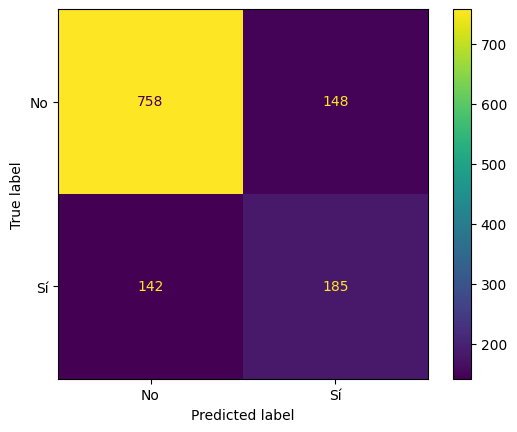

In [176]:
matriz_confusion_tree = confusion_matrix(y_val, y_previsto_tree)
print(matriz_confusion_tree)
visualizacion_tree = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_tree,
                                            display_labels = ['No', 'Sí'])
visualizacion_tree.plot();

In [177]:
metricas_precision('DecisionTree', y_val, y_previsto_tree)

La precisión del modelo DecisionTree es: 0.5555555555555556
La sencibilidad (Recall) del modelo DecisionTree es: 0.5657492354740061
La exactitud del modelo DecisionTree es: 0.764801297648013
El f-1 score del modelo DecisionTree es: 0.5606060606060606


In [178]:
print(classification_report(y_val, y_previsto_tree))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       906
         1.0       0.56      0.57      0.56       327

    accuracy                           0.76      1233
   macro avg       0.70      0.70      0.70      1233
weighted avg       0.77      0.76      0.77      1233



####**Evaluación RandomForest**

In [195]:
y_previsto_forest = modelo_forest.predict(X_val)

[[790 116]
 [143 184]]


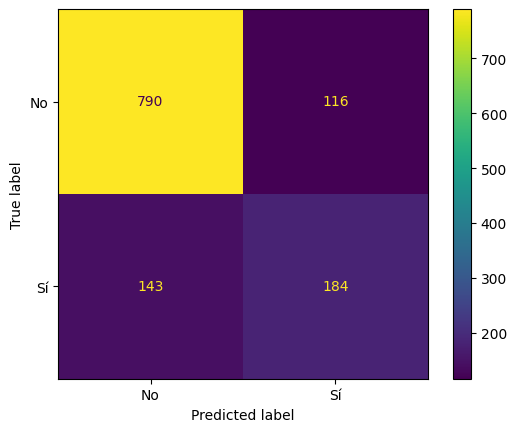

In [196]:
matriz_confusion_forest = confusion_matrix(y_val, y_previsto_forest)
print(matriz_confusion_forest)
visualizacion_forest = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_forest,
                                            display_labels = ['No', 'Sí'])
visualizacion_forest.plot();

In [182]:
metricas_precision('RandomForest', y_val, y_previsto_forest)

La precisión del modelo RandomForest es: 0.6166666666666667
La sencibilidad (Recall) del modelo RandomForest es: 0.5657492354740061
La exactitud del modelo RandomForest es: 0.7915652879156528
El f-1 score del modelo RandomForest es: 0.5901116427432217


In [183]:
print(classification_report(y_val, y_previsto_forest))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       906
         1.0       0.62      0.57      0.59       327

    accuracy                           0.79      1233
   macro avg       0.73      0.72      0.73      1233
weighted avg       0.79      0.79      0.79      1233



####**Evaluación KNN**

In [184]:
y_previsto_knn = modelo_knn.predict(X_val_first_norm)

[[586 320]
 [ 82 245]]


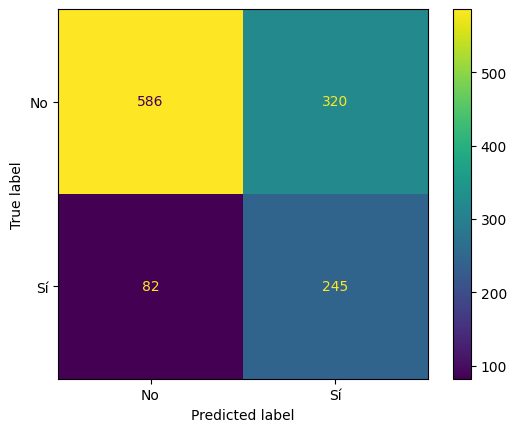

In [185]:
matriz_confusion_knn = confusion_matrix(y_val, y_previsto_knn)
print(matriz_confusion_knn)
visualizacion_knn = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_knn,
                                            display_labels = ['No', 'Sí'])
visualizacion_knn.plot();

In [186]:
metricas_precision('KNN', y_val, y_previsto_knn)

La precisión del modelo KNN es: 0.4336283185840708
La sencibilidad (Recall) del modelo KNN es: 0.7492354740061162
La exactitud del modelo KNN es: 0.6739659367396593
El f-1 score del modelo KNN es: 0.5493273542600897


In [187]:
print(classification_report(y_val, y_previsto_knn))

              precision    recall  f1-score   support

         0.0       0.88      0.65      0.74       906
         1.0       0.43      0.75      0.55       327

    accuracy                           0.67      1233
   macro avg       0.66      0.70      0.65      1233
weighted avg       0.76      0.67      0.69      1233



####**Evaluación Regresión Logística**

In [188]:
y_previsto_regression = modelo_regression.predict(X_val_first_norm)

[[672 234]
 [ 73 254]]


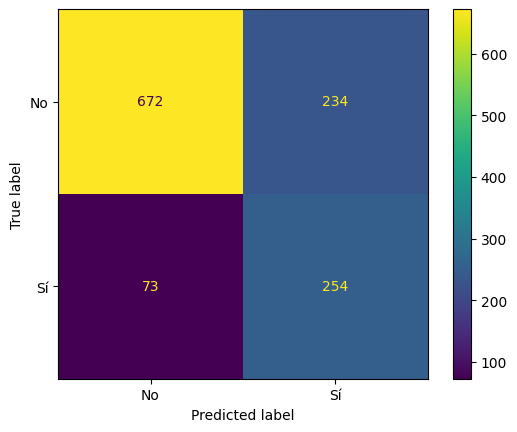

In [189]:
matriz_confusion_reg = confusion_matrix(y_val, y_previsto_regression)
print(matriz_confusion_reg)
visualizacion_reg = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_reg,
                                            display_labels = ['No', 'Sí'])
visualizacion_reg.plot();

In [190]:
metricas_precision('Regresión logistica', y_val_first, y_previsto_regression)

La precisión del modelo Regresión logistica es: 0.5204918032786885
La sencibilidad (Recall) del modelo Regresión logistica es: 0.7767584097859327
La exactitud del modelo Regresión logistica es: 0.7510137875101379
El f-1 score del modelo Regresión logistica es: 0.6233128834355828


In [191]:
print(classification_report(y_val_first, y_previsto_regression))

              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81       906
         1.0       0.52      0.78      0.62       327

    accuracy                           0.75      1233
   macro avg       0.71      0.76      0.72      1233
weighted avg       0.80      0.75      0.76      1233

